## WWC ML for Social Good Covid-19 Hackathon

### Household Pulse Survey and Mental Health

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

import boto3
import io
#from sagemaker import get_execution_role
import os
#import sagemaker.amazon.common as smac pd.set_option('display.max_rows', None)
#import sagemaker

from sklearn import preprocessing

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
# print full data frame

In [21]:
#week_2_df = pd.read_csv("pulse2020_puf_02.csv")
#week_2_df.shape

# week 1 through I think 6 only have 82 columns. We could work around that.
# but I thought it would be more simple to just choose weeks, spread out, that all
  # have the same column count
# so I uploaded week 7 to the drive and pulled it in here instead of week 2

(41996, 82)

In [198]:
week_7_df = pd.read_csv("pulse2020_puf_07.csv")
week_7_df.shape
# import week 7 data

(73472, 105)

In [14]:
list(week_7_df)

['SCRAM',
 'WEEK',
 'EST_ST',
 'EST_MSA',
 'PWEIGHT',
 'TBIRTH_YEAR',
 'ABIRTH_YEAR',
 'EGENDER',
 'AGENDER',
 'RHISPANIC',
 'AHISPANIC',
 'RRACE',
 'ARACE',
 'EEDUC',
 'AEDUC',
 'MS',
 'THHLD_NUMPER',
 'AHHLD_NUMPER',
 'THHLD_NUMKID',
 'AHHLD_NUMKID',
 'THHLD_NUMADLT',
 'WRKLOSS',
 'EXPCTLOSS',
 'ANYWORK',
 'KINDWORK',
 'RSNNOWRK',
 'UNEMPPAY',
 'EIP',
 'EIPSPND1',
 'EIPSPND2',
 'EIPSPND3',
 'EIPSPND4',
 'EIPSPND5',
 'EIPSPND6',
 'EIPSPND7',
 'EIPSPND8',
 'EIPSPND9',
 'EIPSPND10',
 'EIPSPND11',
 'EIPSPND12',
 'EIPSPND13',
 'SPNDSRC1',
 'SPNDSRC2',
 'SPNDSRC3',
 'SPNDSRC4',
 'SPNDSRC5',
 'SPNDSRC6',
 'SPNDSRC7',
 'PRIFOODSUF',
 'CURFOODSUF',
 'CHILDFOOD',
 'FOODSUFRSN1',
 'FOODSUFRSN2',
 'FOODSUFRSN3',
 'FOODSUFRSN4',
 'FOODSUFRSN5',
 'FREEFOOD',
 'WHEREFREE1',
 'WHEREFREE2',
 'WHEREFREE3',
 'WHEREFREE4',
 'WHEREFREE5',
 'WHEREFREE6',
 'WHEREFREE7',
 'TSPNDFOOD',
 'TSPNDPRPD',
 'FOODCONF',
 'HLTHSTATUS',
 'ANXIOUS',
 'WORRY',
 'INTEREST',
 'DOWN',
 'HLTHINS1',
 'HLTHINS2',
 'HLTHINS3',

In [199]:
week_9_df = pd.read_csv("pulse2020_puf_09.csv")
week_9_df.shape
# import week 9 data

(98663, 105)

In [200]:
week_12_df = pd.read_csv("pulse2020_puf_12.csv")
week_12_df.shape
# import week 12 data

(86792, 105)

In [201]:
data1 = week_7_df.append(week_9_df)
data1.shape
# stack week 7 and week 9 data frames and view shape
# can use concat function as well

(172135, 105)

In [202]:
data = data1.append(week_12_df)
data.shape
# stack data1 and week 12 data frames and view shape


(258927, 105)

In [53]:
data.head(10)
# glimpse of data frame, first 10 rows

SCRAM  WEEK  EST_ST  EST_MSA       PWEIGHT  \
0  V050000004S70040487000121  7     42      37980.0  11169.979425   
1  V050000005S70050847100111  7     5      NaN       2323.963314    
2  V050000008S96080333010111  7     6      NaN       14594.211515   
3  V050010002S75120726500111  7     12     NaN       10588.543683   
4  V050010005S30150638500111  7     15     NaN       508.324240     
5  V050010006S72160696700121  7     16     NaN       1131.826329    
6  V050010062M32132513710111  7     13      12060.0  13493.172313   
7  V050010062M76130638400121  7     13      12060.0  17676.732201   
8  V050010062M98130108500111  7     13      12060.0  7486.021100    
9  V050010062M98130502600111  7     13      12060.0  5973.805125    

   TBIRTH_YEAR  ABIRTH_YEAR  EGENDER  AGENDER  RHISPANIC  AHISPANIC  RRACE  \
0  1990         2            1        2        1          2          1       
1  1976         2            2        2        1          2          1       
2  1990         2            1        2        1          2          1       
3  1951         2            2        2        1          2          1       
4  1943         2            1        2        1          2          1       
5  1941         2            2        2        1          2          1       
6  1961         2            2        2        1          2          2       
7  1981         2            1        2        1          2          2       
8  1947         2            1        2        1          2          1       
9  1978         2            2        2        1          2          1       

   ARACE  EEDUC  AEDUC  MS  THHLD_NUMPER  AHHLD_NUMPER  THHLD_NUMKID  \
0  2      7      2      5   2             2             0              
1  2      6      2      1   4             2             2              
2  2      7      2      5   2             2             0              
3  2      6      2      3   1             2             0              
4  2      6      2      5   1             2             0              
5  2      5      2      3   1             2             0              
6  2      6      2      1   3             2             0              
7  2      7      2      1   3             2             1              
8  2      6      2      1   2             2             0              
9  2      6      2      1   4             2             2              

   AHHLD_NUMKID  THHLD_NUMADLT  WRKLOSS  EXPCTLOSS  ANYWORK  KINDWORK  \
0  2             2              2        1          1        1          
1  2             2              2        2          1        2          
2  2             2              2        2          1        2          
3  2             1              1        2          1        3          
4  2             1              2        2          2       -88         
5  2             1              2        2          2       -88         
6  2             3              2        2          2       -88         
7  2             2              2        2          1        2          
8  2             2              2        2          1        2          
9  2             2              1        1          1        3          

   RSNNOWRK  UNEMPPAY  EIP  EIPSPND1  EIPSPND2  EIPSPND3  EIPSPND4  EIPSPND5  \
0 -88       -88        1    1         1         1        -99       -99         
1 -88       -88        3   -99       -99       -99       -99       -99         
2 -88       -88        4   -88       -88       -88       -88       -88         
3 -88       -88        2   -99       -99       -99       -99       -99         
4  7         4         4   -88       -88       -88       -88       -88         
5  7         4         3    1        -99        1        -99       -99         
6  7         4         1    1        -99       -99       -99       -99         
7 -88       -88        1    1        -99        1        -99       -99         
8 -88       -88        4   -88       -88       -88       -88       -88         
9 -88  

In [55]:
data.isnull().sum()
# 179962/258927 nas in column est_msa = metropolitan statistical area zipcode
  # drop est-msa due to the high percentage of missing values
# -99 means seen but category not selected, will convert to 0 for our purposes
# -88 means missing, did not report, will convert to 0
# not reported or not selected can mean/relay a lot especially in surveys (bias) 
  # but we are not focusing on that in this project 

SCRAM            0     
WEEK             0     
EST_ST           0     
EST_MSA          179962
PWEIGHT          0     
TBIRTH_YEAR      0     
ABIRTH_YEAR      0     
EGENDER          0     
AGENDER          0     
RHISPANIC        0     
AHISPANIC        0     
RRACE            0     
ARACE            0     
EEDUC            0     
AEDUC            0     
MS               0     
THHLD_NUMPER     0     
AHHLD_NUMPER     0     
THHLD_NUMKID     0     
AHHLD_NUMKID     0     
THHLD_NUMADLT    0     
WRKLOSS          0     
EXPCTLOSS        0     
ANYWORK          0     
KINDWORK         0     
RSNNOWRK         0     
UNEMPPAY         0     
EIP              0     
EIPSPND1         0     
EIPSPND2         0     
EIPSPND3         0     
EIPSPND4         0     
EIPSPND5         0     
EIPSPND6         0     
EIPSPND7         0     
EIPSPND8         0     
EIPSPND9         0     
EIPSPND10        0     
EIPSPND11        0     
EIPSPND12        0     
EIPSPND13        0     
SPNDSRC1        

In [203]:
data.drop(["SCRAM","PWEIGHT","EST_MSA","WEEK","ABIRTH_YEAR",
           "AGENDER", "AHISPANIC", "ARACE", "AEDUC", "AHHLD_NUMPER",
           "AHHLD_NUMKID"], axis=1, inplace=True)
# drop initial unwanted columns

In [182]:
data.shape

(258927, 94)

In [60]:
data.head()

EST_ST  TBIRTH_YEAR  EGENDER  AGENDER  RHISPANIC  AHISPANIC  RRACE  ARACE  \
0  42      1990         1        2        1          2          1      2       
1  5       1976         2        2        1          2          1      2       
2  6       1990         1        2        1          2          1      2       
3  12      1951         2        2        1          2          1      2       
4  15      1943         1        2        1          2          1      2       

   EEDUC  AEDUC  MS  THHLD_NUMPER  AHHLD_NUMPER  THHLD_NUMKID  AHHLD_NUMKID  \
0  7      2      5   2             2             0             2              
1  6      2      1   4             2             2             2              
2  7      2      5   2             2             0             2              
3  6      2      3   1             2             0             2              
4  6      2      5   1             2             0             2              

   THHLD_NUMADLT  WRKLOSS  EXPCTLOSS  ANYWORK  KINDWORK  RSNNOWRK  UNEMPPAY  \
0  2              2        1          1        1        -88       -88         
1  2              2        2          1        2        -88       -88         
2  2              2        2          1        2        -88       -88         
3  1              1        2          1        3        -88       -88         
4  1              2        2          2       -88        7         4          

   EIP  EIPSPND1  EIPSPND2  EIPSPND3  EIPSPND4  EIPSPND5  EIPSPND6  EIPSPND7  \
0  1    1         1         1        -99       -99       -99       -99         
1  3   -99       -99       -99       -99       -99       -99       -99         
2  4   -88       -88       -88       -88       -88       -88       -88         
3  2   -99       -99       -99       -99       -99       -99       -99         
4  4   -88       -88       -88       -88       -88       -88       -88         

   EIPSPND8  EIPSPND9  EIPSPND10  EIPSPND11  EIPSPND12  EIPSPND13  SPNDSRC1  \
0 -99       -99       -99        -99        -99        -99         1          
1 -99       -99       -99        -99         1         -99         1          
2 -88       -88       -88        -88        -88        -88         1          
3 -99       -99        1         -99        -99        -99         1          
4 -88       -88       -88        -88        -88        -88         1          

   SPNDSRC2  SPNDSRC3  SPNDSRC4  SPNDSRC5  SPNDSRC6  SPNDSRC7  PRIFOODSUF  \
0 -99       -99       -99       -99       -99       -99        2            
1 -99       -99       -99       -99       -99       -99        1            
2 -99       -99       -99       -99       -99       -99        1            
3 -99       -99       -99       -99       -99       -99        1            
4 -99       -99       -99       -99       -99       -99        1            

   CURFOODSUF  CHILDFOOD  FOODSUFRSN1  FOODSUFRSN2  FOODSUFRSN3  FOODSUFRSN4  \
0  2          -88         1           -99          -99          -99            
1  1          -88        -88          -88          -88          -88            
2  1          -88        -88          -88          -88          -88            
3  2          -88        -99          -99          -99          -99            
4  1          -88        -88          -88          -88          -88            

   FOODSUFRSN5  FREEFOOD  WHEREFREE1  WHEREFREE2  WHEREFREE3  WHEREFREE4  \
0  1            2        -88         -88         -88         -88           
1 -88           2        -88         -88         -88         -88           
2 -88           2        -88         -88         -88         -88           
3  1            2        -88         -88         -88         -88           
4 -88           2        -88         -88         -88         -88           

   WHEREFREE5  WHEREFREE6  WHEREFREE7  TSPNDFOOD  TSPNDPRPD  FOODCONF  \
0 -88         -88         -88          500        100        2          
1 -88         -88         -88          100        75         4       

In [204]:
data.columns = data.columns.str.lower()
# convert column names into lower case

In [62]:
data.tail()

est_st  tbirth_year  egender  agender  rhispanic  ahispanic  rrace  \
86787  56      1999         1        2        1          2          1       
86788  56      1959         2        2        1          1          4       
86789  56      1958         2        2        1          2          1       
86790  56      1966         1        2        1          2          1       
86791  56      1974         1        2        1          2          1       

       arace  eeduc  aeduc  ms  thhld_numper  ahhld_numper  thhld_numkid  \
86787  2      3      2      5   4             2             0              
86788  2      7      2      3   1             2             0              
86789  2      4      2      3   1             2             0              
86790  2      4      2      3   1             2             0              
86791  2      5      2      3   1             2             0              

       ahhld_numkid  thhld_numadlt  wrkloss  expctloss  anywork  kindwork  \
86787  2             4              2        2          1        2          
86788  2             1              2        2          1        1          
86789  2             1              2        2          1        4          
86790  2             1              2        1          1        2          
86791  2             1              1        1          1        2          

       rsnnowrk  unemppay  eip  eipspnd1  eipspnd2  eipspnd3  eipspnd4  \
86787 -88       -88        1    1        -99       -99       -99         
86788 -88       -88        2   -99       -99       -99       -99         
86789 -88       -88        1    1        -99       -99       -99         
86790 -88       -88        1    1         1         1        -99         
86791 -88       -88        2   -99       -99       -99       -99         

       eipspnd5  eipspnd6  eipspnd7  eipspnd8  eipspnd9  eipspnd10  eipspnd11  \
86787 -99        1        -99       -99        1        -99        -99          
86788 -99       -99       -99       -99       -99        1         -99          
86789 -99        1        -99       -99       -99       -99        -99          
86790 -99        1        -99       -99       -99       -99        -99          
86791 -99       -99       -99       -99       -99        1         -99          

       eipspnd12  eipspnd13  spndsrc1  spndsrc2  spndsrc3  spndsrc4  spndsrc5  \
86787 -99        -99         1        -99       -99       -99       -99         
86788 -99        -99         1        -99       -99       -99       -99         
86789 -99        -99         1        -99        1        -99       -99         
86790 -99        -99         1        -99        1        -99       -99         
86791 -99        -99        -99       -99        1        -99       -99         

       spndsrc6  spndsrc7  prifoodsuf  curfoodsuf  childfood  foodsufrsn1  \
86787 -99       -99        1           1          -88        -88            
86788 -99       -99        1           1          -88        -88            
86789 -99       -99        1           2          -88        -99            
86790 -99       -99        1           2          -88        -99            
86791 -99       -99        3           2          -88        -99            

       foodsufrsn2  foodsufrsn3  foodsufrsn4  foodsufrsn5  freefood  \
86787 -88          -88          -88          -88           2          
86788 -88          -88          -88          -88          -88         
86789 -99          -99          -99           1            2          
86790 -99           1           -99          -99           2          
86791 -99          -99          -99           1            2          

       wherefree1  wherefree2  wherefree3  wherefree4  wherefree5  wherefree6  \
86787 -88         -88         -88         -88         -88         -88           
86788 -88         -88         -88         -88         -88         -88           
86789 -88         -88         -88         -88         -88         -88   

In [155]:
data.dtypes
# some of our columns are ordinal like worry and anxious. the answers are on a scale, order matters. 
# a few are open ended survey questions and continuous integers like tspndfood and tspndprpd
# some are nominal variables like race and hlthins1: discrete with no relationhip between categories. 
  # we may want to one hot encode those
# most of our columns are truly categorical but have been converted to numerical
# most ML algorithms take numerical input 
# https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/ 

est_st           int64  
tbirth_year      int64  
egender          int64  
rhispanic        int64  
rrace            int64  
eeduc            int64  
ms               int64  
thhld_numper     int64  
thhld_numkid     int64  
thhld_numadlt    int64  
wrkloss          int64  
expctloss        int64  
anywork          int64  
kindwork         int64  
rsnnowrk         int64  
unemppay         int64  
eip              int64  
eipspnd1         int64  
eipspnd2         int64  
eipspnd3         int64  
eipspnd4         int64  
eipspnd5         int64  
eipspnd6         int64  
eipspnd7         int64  
eipspnd8         int64  
eipspnd9         int64  
eipspnd10        int64  
eipspnd11        int64  
eipspnd12        int64  
eipspnd13        int64  
spndsrc1         int64  
spndsrc2         int64  
spndsrc3         int64  
spndsrc4         int64  
spndsrc5         int64  
spndsrc6         int64  
spndsrc7         int64  
prifoodsuf       int64  
curfoodsuf       int64  
childfood        int64  


In [16]:
data.info

In [205]:
d = {-88:0,-99:0}
data = data.replace(d)
# one way to handle "missing" data above for example
# replacing missing data with 0 is most often not the right answer. But since
  # -99 means the option was not selected when the question states to select all that apply, 
    # it would make sense here. The -88 is labeled by the authors as missing and they replaced
    # missing with -88.

# we will discuss how we want to proceed with this, depending on ML model as well
# some questions had "choose all that apply" options, for that the authors 
  # made a column for each option. There is a 1 if they selected it, 2 if they selected no and and a -99
  # in other answer options that the survey responder did not choose
# they made nominal data into integers which have no particular order/ranking

In [207]:
for col in ["foodsufrsn1", "foodsufrsn2", "foodsufrsn3",
      "foodsufrsn4", "foodsufrsn5","eipspnd1", "eipspnd2",
      "eipspnd3", "eipspnd4", "eipspnd5", "eipspnd6",
      "eipspnd7", "eipspnd8", "eipspnd9", "eipspnd10",
      "eipspnd11", "eipspnd12", "eipspnd13", "spndsrc1",
      "spndsrc2", "spndsrc3", "spndsrc4", "spndsrc5",
      "spndsrc6", "spndsrc7", "wherefree1",
      "wherefree2", "wherefree3", "wherefree4", "wherefree5",
      "wherefree6", "wherefree7", "hlthins1", "hlthins2",
      "hlthins3", "hlthins4", "hlthins5", "hlthins6", "hlthins7",
      "hlthins8", "enroll1", "enroll2", "enroll3", "teach1",
      "teach2", "teach3", "teach4", "teach5", "comp1", "comp2",
      "comp3", "intrnt1", "intrnt2", "intrnt3", "est_st", "egender",
      "rhispanic", "rrace", "ms", "thhld_numper", "thhld_numkid",
      "thhld_numadlt", "wrkloss", "expctloss", "eip", "anywork",
      "kindwork", "rsnnowrk", "unemppay", "mortlmth", "tenure",
      "notget", "delay", "prifoodsuf", "curfoodsuf", "childfood",
      "freefood"]:
    data[col] = data[col].astype("category")
    
# make nominal numerical columns into categorical in prep for one-hot

In [208]:
data.dtypes

est_st           category
tbirth_year      int64   
egender          category
rhispanic        category
rrace            category
eeduc            int64   
ms               category
thhld_numper     category
thhld_numkid     category
thhld_numadlt    category
wrkloss          category
expctloss        category
anywork          category
kindwork         category
rsnnowrk         category
unemppay         category
eip              category
eipspnd1         category
eipspnd2         category
eipspnd3         category
eipspnd4         category
eipspnd5         category
eipspnd6         category
eipspnd7         category
eipspnd8         category
eipspnd9         category
eipspnd10        category
eipspnd11        category
eipspnd12        category
eipspnd13        category
spndsrc1         category
spndsrc2         category
spndsrc3         category
spndsrc4         category
spndsrc5         category
spndsrc6         category
spndsrc7         category
prifoodsuf       category
curfoodsuf  

In [209]:
data["tbirth_year"] = pd.Timestamp("now").year - data["tbirth_year"] 
# convert birth year to age

In [210]:
data["tbirth_year"]

0        30
1        44
2        30
3        69
4        77
5        79
6        59
7        39
8        73
9        42
10       60
11       74
12       72
13       67
14       43
15       65
16       78
17       65
18       67
19       77
20       67
21       39
22       62
23       78
24       68
25       65
26       33
27       73
28       56
29       36
30       52
31       71
32       63
33       77
34       75
35       70
36       38
37       60
38       52
39       78
40       30
41       46
42       75
43       61
44       64
45       32
46       45
47       46
48       67
49       37
50       45
51       38
52       49
53       53
54       68
55       69
56       64
57       45
58       78
59       83
60       73
61       62
62       31
63       76
64       66
65       36
66       50
67       43
68       51
69       63
70       37
71       76
72       47
73       55
74       44
75       52
76       40
77       62
78       47
79       36
80       54
81       88
82       57
83  

In [211]:
bins = [0, 18, 25, 35, 45, 55, 65, np.inf]
names = ["0-18", "18-25", "25-35", "35-45", "45-55", "55-65", "65+"]

data["age_range"] = pd.cut(data["tbirth_year"], bins, labels=names)

print(data.dtypes)
# bin tbirth_year and convert into age_range column and to categorical

est_st           category
tbirth_year      int64   
egender          category
rhispanic        category
rrace            category
eeduc            int64   
ms               category
thhld_numper     category
thhld_numkid     category
thhld_numadlt    category
wrkloss          category
expctloss        category
anywork          category
kindwork         category
rsnnowrk         category
unemppay         category
eip              category
eipspnd1         category
eipspnd2         category
eipspnd3         category
eipspnd4         category
eipspnd5         category
eipspnd6         category
eipspnd7         category
eipspnd8         category
eipspnd9         category
eipspnd10        category
eipspnd11        category
eipspnd12        category
eipspnd13        category
spndsrc1         category
spndsrc2         category
spndsrc3         category
spndsrc4         category
spndsrc5         category
spndsrc6         category
spndsrc7         category
prifoodsuf       category
curfoodsuf  

In [212]:
data["age_range"].value_counts()

65+      58548
55-65    53229
35-45    51442
45-55    48622
25-35    36626
18-25    9852 
0-18     608  
Name: age_range, dtype: int64

In [213]:
data.drop(["tbirth_year"], axis=1, inplace=True)
# drop tbirth_year column

In [192]:
data.dtypes

est_st           category
egender          category
rhispanic        category
rrace            category
eeduc            int64   
ms               category
thhld_numper     category
thhld_numkid     category
thhld_numadlt    category
wrkloss          category
expctloss        category
anywork          category
kindwork         category
rsnnowrk         category
unemppay         category
eip              category
eipspnd1         category
eipspnd2         category
eipspnd3         category
eipspnd4         category
eipspnd5         category
eipspnd6         category
eipspnd7         category
eipspnd8         category
eipspnd9         category
eipspnd10        category
eipspnd11        category
eipspnd12        category
eipspnd13        category
spndsrc1         category
spndsrc2         category
spndsrc3         category
spndsrc4         category
spndsrc5         category
spndsrc6         category
spndsrc7         category
prifoodsuf       category
curfoodsuf       category
childfood   

In [28]:
pd.crosstab(data.eeduc,data.anxious)
# we may see the anxiety go up as the education level goes up

anxious     0      1      2     3      4
eeduc                                   
1        240   436    419    218   336  
2        624   1003   1129   512   739  
3        3250  9367   8903   3985  4927 
4        5023  15889  17374  7574  9981 
5        2209  8123   8656   3647  4511 
6        5387  23642  25405  9159  11216
7        4058  21607  23083  7529  8766

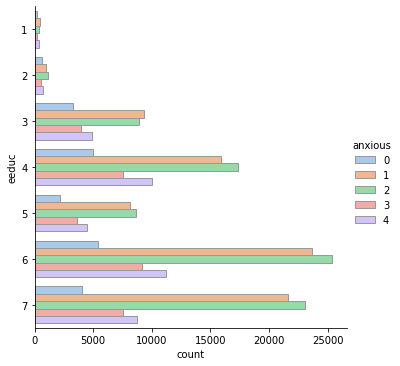

In [34]:
sns.catplot(y="eeduc", hue="anxious", kind="count",
            palette="pastel", edgecolor=".6",
            data=data);

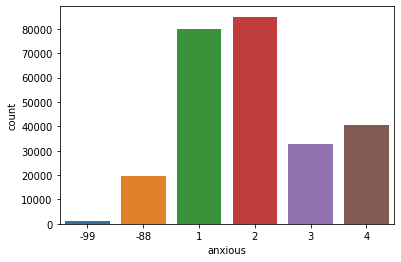

In [106]:
sns.countplot(data["anxious"]);
# view the count in each category of the anxious column
# this column is ordinal as the numbers are in a scale (ordered) from not anxious 1
  # to is anxious 4

In [123]:
data["anxious"].value_counts()
# 1 is not at all
# 2 is several days
# 3 is more than half the days
# 4 is nearly every day

 2     84969
 1     80067
 4     40476
 3     32624
-88    19557
-99    1234 
Name: anxious, dtype: int64

In [133]:
data.loc[data["worry"] == 4, :].head(10)
# looks at rows only where worry is a 4. 
# can check out other attributes that go along with the 4 (per individual)
# note: just glancing here, the worry 4s go alongside anxious and interest 4s

week  est_st  est_msa  tbirth_year  abirth_year  egender  agender  \
2    7     6      NaN       1990         2            1        2         
27   7     12      33100.0  1947         2            2        2         
45   7     51     NaN       1988         2            1        2         
51   7     53      42660.0  1982         2            1        2         
61   7     12     NaN       1958         2            1        2         
77   7     21     NaN       1958         2            2        2         
85   7     26     NaN       1978         2            2        2         
101  7     35     NaN       1954         2            1        2         
111  7     36      35620.0  1954         2            2        2         
117  7     41     NaN       1956         2            1        2         

     rhispanic  ahispanic  rrace  arace  eeduc  aeduc  ms  thhld_numper  \
2    1          2          1      2      7      2      5   2              
27   1          2          1      2      5      2      3   1              
45   1          2          2      2      4      2      5   4              
51   1          2          1      2      7      2      5   1              
61   1          2          1      2      4      2      1   3              
77   1          2          1      2      3      2      1   2              
85   1          2          1      2      5      2      1   4              
101  1          2          4      2      6      2      3   1              
111  2          2          1      2      6      2      1   2              
117  1          2          1      2      4      2      3   1              

     ahhld_numper  thhld_numkid  ahhld_numkid  thhld_numadlt  wrkloss  \
2    2             0             2             2              2         
27   2             0             2             1              2         
45   2             2             2             2              1         
51   2             0             2             1              2         
61   2             0             2             3              1         
77   2             0             2             2              2         
85   2             2             2             2              1         
101  2             0             2             1              2         
111  2             0             2             2              2         
117  2             0             2             1              2         

     expctloss  anywork  kindwork  rsnnowrk  unemppay  eip  eipspnd1  \
2    2          1        2        -88       -88        4   -88         
27   2          2       -88        7         4         1    1          
45   2          2       -88        11        4         1    1          
51   2          1        1        -88       -88        3   -99         
61   2          1        1        -88       -88        2   -99         
77   2          2       -88        10        2         1    1          
85   1          1        2        -88       -88        1    1          
101  2          2       -88        6         4         1    1          
111  1          1        1        -88       -88        2    1          
117  2          2       -88        12        2         1    1          

     eipspnd2  eipspnd3  eipspnd4  eipspnd5  eipspnd6  eipspnd7  eipspnd8  \
2   -88       -88       -88       -88       -88       -88       -88         
27  -99       -99       -99       -99       -99       -99       -99         
45  -99        1        -99       -99        1        -99        1          
51  -99       -99       -99       -99       -99       -99       -99         
61  -99       -99       -99       -99        1        -99        1          
77   1         1        -99       -99       -99       -99        1          
85   1         1        -99       -99       -99        1        -99         
101 -99        1        -99       -99       -99        1         1          
111 -99        1        -99       -99       -99       -99        1        

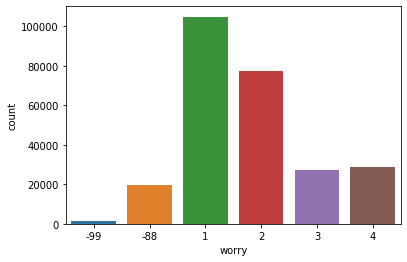

In [107]:
sns.countplot(data["worry"]);

In [38]:
pd.crosstab(data.eeduc,data.down)

down      0      1      2     3     4
eeduc                                
1      252   527    415    194   261 
2      634   1231   1157   458   527 
3      3277  12308  8417   3222  3208
4      5036  22595  16492  5756  5962
5      2222  11793  7981   2634  2516
6      5409  35801  22396  5814  5389
7      4063  33492  19408  4295  3785

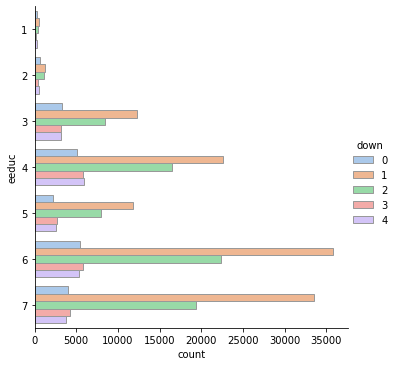

In [39]:
sns.catplot(y="eeduc", hue="down", kind="count",
            palette="pastel", edgecolor=".6",
            data=data);

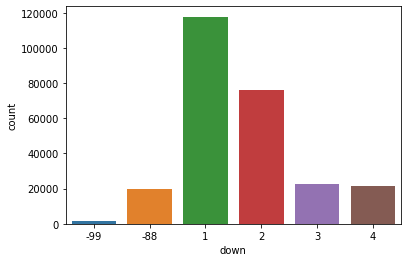

In [108]:
sns.countplot(data["down"]);

In [125]:
data["down"].value_counts()

 1     117747
 2     76266 
 3     22373 
 4     21648 
-88    19557 
-99    1336  
Name: down, dtype: int64

In [ ]:
sns.catplot(y="rrace", hue="down", kind="count",
            palette="dark", edgecolor=".6",
            data=data);

In [ ]:
sns.catplot(y="wrkloss", hue="anxiety", kind="count",
            palette="bright", edgecolor=".6",
            data=data);

In [ ]:
ax = sns.countplot(x="wrkloss", hue="down", data=data)

In [ ]:
sns.catplot(y="curfoodsuf", hue="anxiety", kind="count",
            palette="deep", edgecolor=".6",
            data=data);

In [ ]:
sns.catplot(y="childfood", hue="down", kind="count",
            palette="muted", edgecolor=".6",
            data=data);

In [ ]:
sns.catplot(y="foodconf", hue="anxiety", kind="count",
            palette="bright", edgecolor=".6",
            data=data);

In [ ]:
sns.catplot(y="mortconf", hue="down", kind="count",
            palette="bright", edgecolor=".6",
            data=data);

In [ ]:
sns.countplot(data["income"]);

In [ ]:
sns.countplot(data["est_st"]);
ax = sns.countplot(x="est_st", hue="anxiety", data=data)

In [ ]:
data=pd.concat([data,pd.get_dummies(data["foodsufrsn1"],prefix="foodsufrsn1")],axis=1).drop(["foodsufrsn1"],axis=1)
# one way to one hot encode, just doing one column
# label encoding to be used for ordinal or high cardinality nominal instead on one hot

In [ ]:
data=pd.concat([data,pd.get_dummies(data["est_st"],prefix="est_st")],axis=1).drop(["est_st"],axis=1)
# this column has fairly high cardinality so label encoding may work best (as is) but 
  # don't want to have deceitful output or biased weights

In [ ]:
def one_hot(data, cols):
    """
    @param data pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(data[each], prefix=each, drop_first=False)
        data = pd.concat([data, dummies], axis=1)
    return data
# function for one hot encoding multiple columns

In [ ]:
cols = data[["foodsufrsn2", "foodsufrsn3","foodsufrsn4", "foodsufrsn5", "eipspnd1", "eipspnd2",
             "eipspnd3", "eipspnd4", "eipspnd5", "eipspnd6","eipspnd7", "eipspnd8", "eipspnd9", 
             "eipspnd10","eipspnd11", "eipspnd12", "eipspnd13", "spndsrc1",
             "spndsrc2", "spndsrc3", "spndsrc4", "spndsrc5",
             "spndsrc6", "spndsrc7", "foodsufrsn2","wherefree1",
             "wherefree2", "wherefree3", "wherefree4", "wherefree5",
             "wherefree6", "wherefree7", "hlthins1", "hlthins2",
             "hlthins3", "hlthins4", "hlthins5", "hlthins6", "hlthins7",
             "hlthins8", "enroll1", "enroll2", "enroll3", "teach1",
             "teach2", "teach3", "teach4", "teach5", "comp1", "comp2",
             "comp3", "intrnt1", "intrnt2", "intrnt3", "egender",
             "rhispanic", "rrace", "ms", "thhld_numper", "thhld_numkid",
             "thhld_numadlt", "wrkloss", "expctloss", "eip", "anywork",
             "kindwork", "rsnnowrk", "unemppay", "mortlmth", "tenure",
             "notget", "delay", "prifoodsuf", "curfoodsuf", "childfood",
             "freefood"]]

In [ ]:
one_hot(data, cols)

In [ ]:
data.head(10)

In [ ]:
data["tspndfood"]=((data["tspndfood"]-data["tspndfood"].min())/
                        (data["tspndfood"].max()-data["tspndfood"].min()))*20
# standardize continuous interger variables

In [ ]:
data["tspndprpd"]=((data["tspndprpd"]-data["tspndprpd"].min())/
                        (data["tspndprpd"].max()-data["tspndprpd"].min()))*20

In [ ]:
data["tschlhrs"]=((data["tschlhrs"]-data["tschlhrs"].min())/
                        (data["tschlhrs"].max()-data["tschlhrs"].min()))*20

In [ ]:
data["tstdy_hrs"]=((data["tstdy_hrs"]-data["tstdy_hrs"].min())/
                        (data["tstdy_hrs"].max()-data["tstdy_hrs"].min()))*20

In [ ]:
data["ttch_hrs"]=((data["ttch_hrs"]-data["ttch_hrs"].min())/
                        (data["ttch_hrs"].max()-data["ttch_hrs"].min()))*20

In [ ]:
data.to_csv("data.csv")
# save new combined data frame in a csv
# this can be pulled into AWS for the model(s)